<font size="5">Assignment #03</font>

Remove Blank Slices

In [6]:
import numpy as np
import nibabel as nib
import matplotlib.pylab as plt

def remove_blank_slices(img,mask):
    """
    Function to remove blank slices
    """
    img_shape = img.shape
    first_non_empty_axial = 0
    last_non_empty_axial = 0
    seen = False
    for i in range(img_shape[0]):
        if not np.any(img[i, :, :]):
            if not seen:
                first_non_empty_axial += 1
            else:
                break
        else:
            seen = True
            last_non_empty_axial = i
    first_non_empty_saggital = 0
    last_non_empty_saggital = 0
    seen = False
    for i in range(img_shape[0]):
        if not np.any(img[:, i, :]):
            if not seen:
                first_non_empty_saggital += 1
            else:
                break
        else:
            seen = True
            last_non_empty_saggital = i
    first_non_empty_coronal = 0
    last_non_empty_coronal = 0
    seen = False
    for i in range(img_shape[0]):
        if not np.any(img[:, :, i]):
            if not seen:
                first_non_empty_coronal += 1
            else:
                break
        else:
            seen = True
            last_non_empty_coronal = i



    img_cropped = img[first_non_empty_axial:last_non_empty_axial, first_non_empty_saggital:last_non_empty_saggital, first_non_empty_coronal:last_non_empty_coronal]
    mask_cropped = mask[first_non_empty_axial:last_non_empty_axial, first_non_empty_saggital:last_non_empty_saggital, first_non_empty_coronal:last_non_empty_coronal]
    return img_cropped,mask_cropped

Image and mask shapes before cropping
(171, 256, 256) (171, 256, 256)


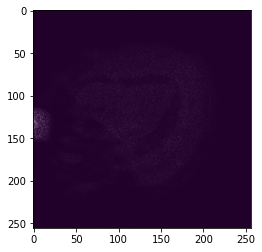

Image and mask shapes after cropping
(170, 170, 170) (170, 170, 170)


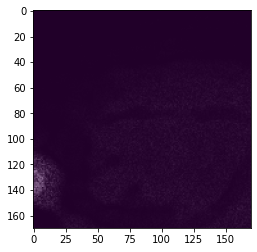

In [7]:
data = nib.load("CC0001_philips_15_55_M.nii.gz").get_fdata()
mask = nib.load("CC0001_philips_15_55_M_staple.nii.gz").get_fdata()

print("Image and mask shapes before cropping")
print(data.shape, mask.shape)


plt.figure()
plt.imshow(data[-1], cmap = "gray")
plt.imshow(mask[-1], alpha = 0.5)
plt.show()

data_cropped, mask_cropped = remove_blank_slices(data ,mask)

print("Image and mask shapes after cropping")
print(data_cropped.shape, mask_cropped.shape)

plt.figure()
plt.imshow(data_cropped[-1], cmap = "gray")
plt.imshow(mask_cropped[-1], alpha = 0.5)
plt.show()

Data Augmentation and Generation

In [ ]:
from data_generator import DataGeneratorUnet
import glob

imgs_list_train = glob.glob(".\\Sample\\Images\\*.npy")
masks_list_train = glob.glob(".\\Sample\\Masks\\*.npy")

batch_size = 4

gen_train = DataGeneratorUnet(imgs_list_train,masks_list_train,batch_size = batch_size)
X,Y = gen_train.__getitem__(0)
plt.figure(figsize = (12,18))
for ii in range(batch_size):
    plt.subplot(1, 4, ii+1)
    plt.imshow(X[ii,:,:,0], cmap = "gray")
    plt.axis("off")
    plt.imshow(Y[ii,:,:,0], cmap='jet', alpha=0.5, interpolation='none')
    plt.axis("off")
plt.show()